In [1]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#dl libraraies
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense , merge
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import ReduceLROnPlateau


from keras.layers.merge import dot
from keras.models import Model

# specifically for deeplearning.
from keras.layers import Dropout, Flatten,Activation,Input,Embedding
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf
import random as rn
from IPython.display import SVG
 
# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

Using TensorFlow backend.
D:\anaconda\anacNew\envs\PythonGPU\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\anaconda\anacNew\envs\PythonGPU\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\anaconda\anacNew\envs\PythonGPU\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\anaconda\anacNew\envs\PythonGPU\lib\site-packag

In [2]:
r_cols = ['userId', 'movieId', 'rating', 'unix_timestamp']

ratings_base = pd.read_csv('L:\\ml-100k\\u1.base', sep='\t', names=r_cols, encoding='latin-1')
ratings_test = pd.read_csv('L:\\ml-100k\\u1.test', sep='\t', names=r_cols, encoding='latin-1')

In [3]:
len(ratings_base['userId'].unique())

943

In [4]:
len(ratings_base['movieId'].unique())

1650

In [5]:
#1650*943=1555950
#however we onnly has 80000 ratings in u1.base
#Hence the utility matrix has only about 5.14 % of the total values.
#Thus it can be concluded that it is quite sparse. This limits the use of some algorithms. 
#Hence we will create embeddings for them later.

In [6]:
df=pd.pivot_table(data=ratings_base,values='rating',index='userId',columns='movieId')

In [7]:
df

movieId,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
userId,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,NaN,4.0,1.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.fillna(0)

movieId,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
userId,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,0.0,4.0,1.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
r_cols = ['userId', 'movieId', 'rating', 'unix_timestamp']

ratings_base = pd.read_csv('L:\\ml-100k\\u1.base', sep='\t', names=r_cols, encoding='latin-1')
ratings_test = pd.read_csv('L:\\ml-100k\\u1.test', sep='\t', names=r_cols, encoding='latin-1')

In [10]:
train=ratings_base
valid=ratings_test
#train.shape

In [11]:
#giving latent factor (auto signed attributes) to 50 for each embedding 
n_latent_factors=50
n_movies=len(train['movieId'].unique())
n_users=len(train['userId'].unique())

In [12]:
#building up user vec
user_input=Input(shape=(1,),name='user_input',dtype='int64')
user_embedding=Embedding(n_users,n_latent_factors,name='user_embedding')(user_input)
user_vec=Flatten(name='FlattenUsers')(user_embedding)
#user_vec=Dropout(0.2)(user_vec)

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
#movies vec
movie_input=Input(shape=(1,),name='movie_input',dtype='int64')
movie_embedding=Embedding(n_movies,n_latent_factors,name='movie_embedding')(movie_input)
movie_vec=Flatten(name='FlattenMovies')(movie_embedding)
#movie_vec=Dropout(0.2)(movie_vec)

In [14]:
#item-user cos similarity
#https://www.tensorflow.org/api_docs/python/tf/keras/layers/dot
sim=dot([user_vec,movie_vec],name='Simalarity-Dot-Product',axes=1)

In [15]:
#view model
#nn_inp=Dense(96,activation='relu')(sim)
#nn_inp=Dropout(0.5)(nn_inp)
#nn_inp=Dense(32,activation='relu')(sim)
## nn_inp=BatchNormalization()(nn_inp)
#nn_inp=Dense(1,activation='relu')(nn_inp)
#nn_model =keras.models.Model([user_input, movie_input],nn_inp)
nn_model =keras.models.Model([user_input, movie_input],sim)
nn_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
movie_input (InputLayer)        (None, 1)            0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 50)        47150       user_input[0][0]                 
__________________________________________________________________________________________________
movie_embedding (Embedding)     (None, 1, 50)        82500       movie_input[0][0]                
____________________________________________________________________________________________

In [16]:
#compiling model by using mse
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

nn_model.compile(optimizer=Adam(lr=0.0002),loss='mse',metrics=[recall_m])

In [17]:
batch_size=128
epochs=100

In [18]:
#import keras_metrics as km
#input userID and MovieID
#predict rating
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

History = nn_model.fit([train.userId,train.movieId],train.rating, batch_size=batch_size,
                              epochs =epochs, validation_data = ([valid.userId,valid.movieId],valid.rating),
                              verbose = 1)

Instructions for updating:
Use tf.cast instead.
Train on 80000 samples, validate on 20000 samples
Epoch 1/100
80000/80000 [==============================] - 1s 15us/step - loss: 13.6997 - recall_m: 0.0000e+00 - val_loss: 13.8290 - val_recall_m: 0.0000e+00
Epoch 2/100
80000/80000 [==============================] - 1s 12us/step - loss: 13.6263 - recall_m: 1.2500e-05 - val_loss: 13.6544 - val_recall_m: 1.4928e-04
Epoch 3/100
80000/80000 [==============================] - 1s 12us/step - loss: 12.7976 - recall_m: 0.3355 - val_loss: 12.1378 - val_recall_m: 0.7086
Epoch 4/100
80000/80000 [==============================] - 1s 12us/step - loss: 9.8717 - recall_m: 0.9040 - val_loss: 8.6883 - val_recall_m: 0.9491
Epoch 5/100
80000/80000 [==============================] - 1s 12us/step - loss: 6.0752 - recall_m: 0.9800 - val_loss: 5.3770 - val_recall_m: 0.9850
Epoch 6/100
80000/80000 [==============================] - 1s 12us/step - loss: 3.5379 - recall_m: 0.9923 - val_loss: 3.4148 - val_recall_m:

Epoch 54/100
80000/80000 [==============================] - 1s 12us/step - loss: 0.7403 - recall_m: 0.9974 - val_loss: 0.8835 - val_recall_m: 0.9984
Epoch 55/100
80000/80000 [==============================] - 1s 12us/step - loss: 0.7339 - recall_m: 0.9974 - val_loss: 0.8816 - val_recall_m: 0.9984
Epoch 56/100
80000/80000 [==============================] - 1s 12us/step - loss: 0.7272 - recall_m: 0.9974 - val_loss: 0.8798 - val_recall_m: 0.9984
Epoch 57/100
80000/80000 [==============================] - 1s 12us/step - loss: 0.7206 - recall_m: 0.9974 - val_loss: 0.8781 - val_recall_m: 0.9984
Epoch 58/100
80000/80000 [==============================] - 1s 12us/step - loss: 0.7137 - recall_m: 0.9974 - val_loss: 0.8761 - val_recall_m: 0.9984
Epoch 59/100
80000/80000 [==============================] - 1s 12us/step - loss: 0.7069 - recall_m: 0.9974 - val_loss: 0.8746 - val_recall_m: 0.9984
Epoch 60/100
80000/80000 [==============================] - 1s 12us/step - loss: 0.7000 - recall_m: 0.9974

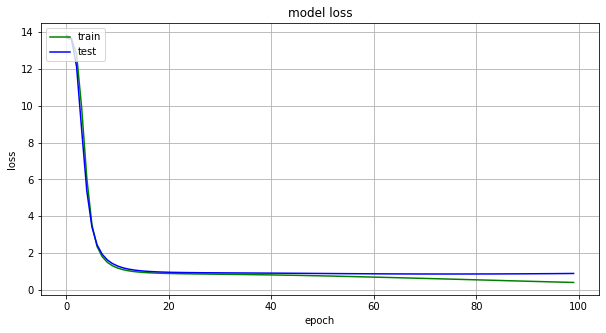

In [19]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
import matplotlib.pyplot as plt
plt.plot(History.history['loss'] , 'g')
plt.plot(History.history['val_loss'] , 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

In [20]:
History.history['val_loss']

[13.82900213623047,
 13.654436018371582,
 12.137837718963622,
 8.688269913482666,
 5.37697611618042,
 3.4148447887420654,
 2.4436306884765626,
 1.9323889129638672,
 1.6272295387268065,
 1.4296338438034057,
 1.2961324466705322,
 1.202189254951477,
 1.1351152726173401,
 1.0860514701843262,
 1.0499671533584596,
 1.0228129583358765,
 1.002424362564087,
 0.986389525794983,
 0.9742531385421753,
 0.9643922908782959,
 0.9562029351234436,
 0.949717108631134,
 0.9452547798633576,
 0.9410105342864991,
 0.9371980899810791,
 0.9345652959823608,
 0.9312088578224182,
 0.9293764772415161,
 0.9279226991653442,
 0.9261430653572083,
 0.9247206352710724,
 0.9226369435310364,
 0.9210154549598694,
 0.9192782312393188,
 0.917633930683136,
 0.9164432640552521,
 0.9147833597183228,
 0.9129781352043151,
 0.9112702367782592,
 0.9100960901260376,
 0.9085800607681275,
 0.9068568686485291,
 0.9052972602367401,
 0.9032642858505249,
 0.9014002611637115,
 0.8993133792877197,
 0.8975771573066711,
 0.8954564036369324,
 

In [21]:
def get_indexes_min_value(l):
    min_value = min(l)
    if l.count(min_value) > 1:
        return [i for i, x in enumerate(l) if x == min(l)]
    else:
        return l.index(min(l)), min_value

In [22]:
get_indexes_min_value(History.history['val_loss'])

(74, 0.8609843382835388)

In [23]:
#History.history['val_loss'][get_indexes_min_value(History.history['val_loss'])]

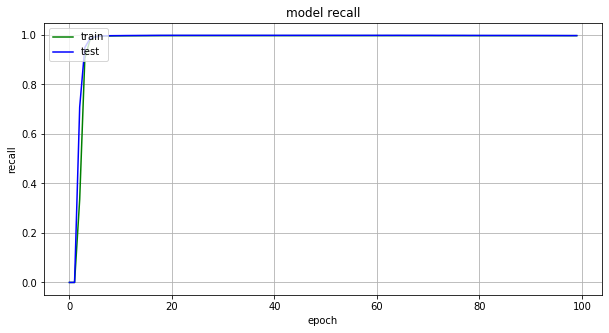

In [24]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
import matplotlib.pyplot as plt
plt.plot(History.history['recall_m'] , 'g')
plt.plot(History.history['val_recall_m'] , 'b')
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

In [25]:
History.history['val_recall_m'][73]

0.9982085824012756